In [1]:
#reading the libraries and loading the breast cancer data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [2]:
X,y=load_breast_cancer(return_X_y=True)
x1=pd.DataFrame(X)




In [3]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)


In [4]:
clf=DecisionTreeClassifier(random_state=0)
clf.fit(X_train,y_train)




DecisionTreeClassifier(random_state=0)

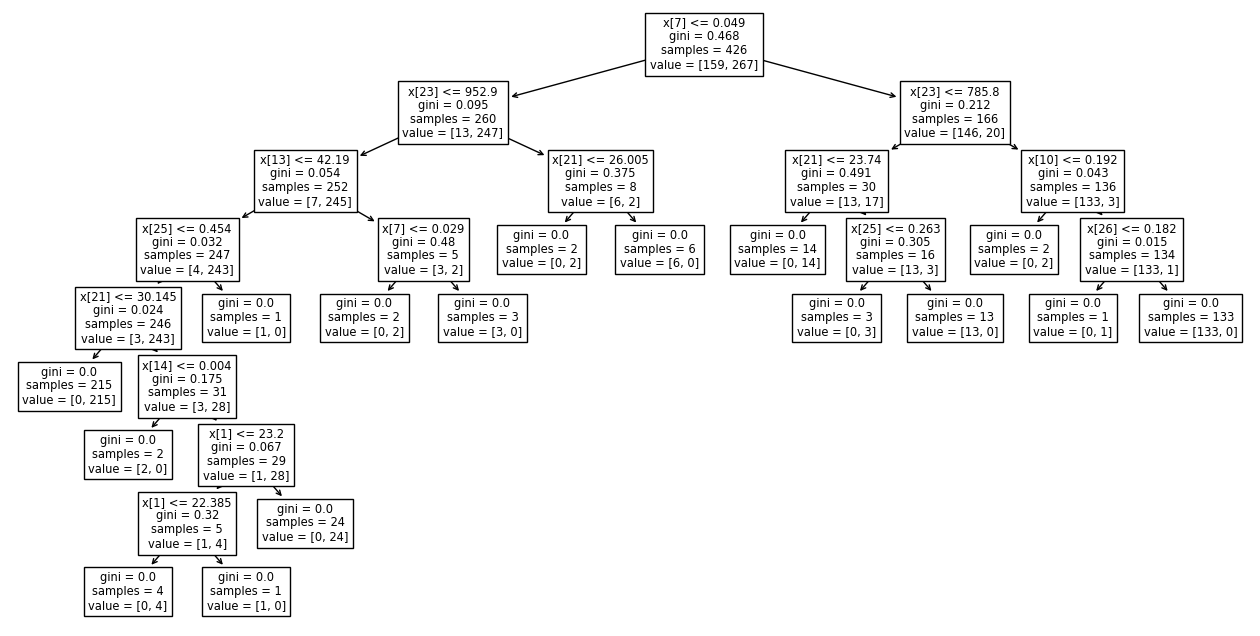

In [5]:
plt.figure(figsize=(16,8))
tree.plot_tree(clf)
plt.show()


In [6]:
y_train_predicted=clf.predict(X_train)
y_test_predicted=clf.predict(X_test)


In [7]:
accuracy_score(y_train,y_train_predicted)


1.0

In [8]:
accuracy_score(y_test,y_test_predicted)

0.8811188811188811

In [ ]:
help(DecisionTreeClassifier)

In [9]:
path=clf.cost_complexity_pruning_path(X_train,y_train)


In [10]:
#path variable gives two things ccp_alphas and impurities
ccp_alphas,impurities=path.ccp_alphas,path.impurities
print("ccp alpha wil give list of values :",ccp_alphas)
print("***********************************************************")
print("Impurities in Decision Tree :",impurities)




ccp alpha wil give list of values : [0.         0.00226647 0.00464743 0.0046598  0.0056338  0.00704225
 0.00784194 0.00911402 0.01144366 0.018988   0.02314163 0.03422475
 0.32729844]
***********************************************************
Impurities in Decision Tree : [0.         0.00453294 0.01847522 0.02313502 0.02876883 0.03581108
 0.04365302 0.05276704 0.0642107  0.0831987  0.10634033 0.14056508
 0.46786352]


In [ ]:
100-0.00453294

In [11]:
clfs=[]   #will store all the models here
for ccp_alpha in ccp_alphas:
    clf=DecisionTreeClassifier(random_state=0,ccp_alpha=ccp_alpha)
    clf.fit(X_train,y_train)
    clfs.append(clf)
print("Last node in Decision tree is {} and ccp_alpha for last node is {}".format(clfs[-1].tree_.node_count,ccp_alphas[-1]))





Last node in Decision tree is 1 and ccp_alpha for last node is 0.3272984419327777


In [12]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
train_scores

[1.0,
 0.9976525821596244,
 0.9906103286384976,
 0.9882629107981221,
 0.9835680751173709,
 0.9788732394366197,
 0.9765258215962441,
 0.971830985915493,
 0.9647887323943662,
 0.9553990610328639,
 0.931924882629108,
 0.9225352112676056,
 0.6267605633802817]

In [13]:
test_scores = [clf.score(X_test, y_test) for clf in clfs]
print(train_scores,test_scores)

[1.0, 0.9976525821596244, 0.9906103286384976, 0.9882629107981221, 0.9835680751173709, 0.9788732394366197, 0.9765258215962441, 0.971830985915493, 0.9647887323943662, 0.9553990610328639, 0.931924882629108, 0.9225352112676056, 0.6267605633802817] [0.8811188811188811, 0.8881118881118881, 0.916083916083916, 0.916083916083916, 0.916083916083916, 0.9230769230769231, 0.9300699300699301, 0.9300699300699301, 0.9370629370629371, 0.916083916083916, 0.916083916083916, 0.8811188811188811, 0.6293706293706294]


In [20]:
acc_df1=pd.DataFrame({'ccp_alpha':ccp_alphas,'Train_ACC':train_scores,'Test_ACC':test_scores})

In [22]:
acc_df1['Error']=acc_df1['Train_ACC']-acc_df1['Test_ACC']

In [25]:
acc_df1

,ccp_alpha,Train_ACC,Test_ACC,Error
0,0.000000,1.000000,0.881119,0.118881
1,0.002266,0.997653,0.888112,0.109541
2,0.004647,0.990610,0.916084,0.074526
3,0.004660,0.988263,0.916084,0.072179
4,0.005634,0.983568,0.916084,0.067484
5,0.007042,0.978873,0.923077,0.055796
6,0.007842,0.976526,0.930070,0.046456
7,0.009114,0.971831,0.930070,0.041761
8,0.011444,0.964789,0.937063,0.027726
9,0.018988,0.955399,0.916084,0.039315


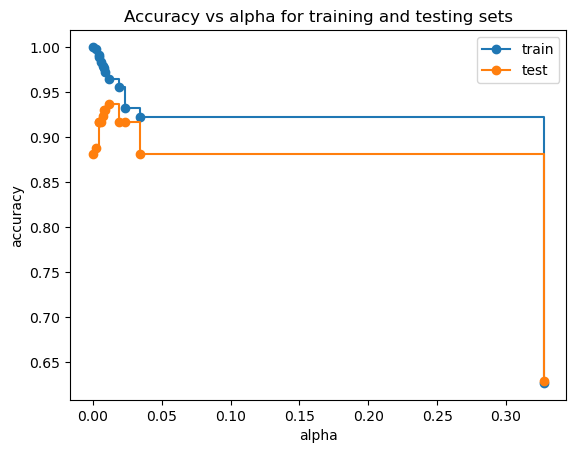

In [26]:
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",drawstyle="steps-post")
ax.legend()
plt.show()




In [ ]:
clf=DecisionTreeClassifier(random_state=0,ccp_alpha=0.02)
clf.fit(X_train,y_train)


In [ ]:
plt.figure(figsize=(12,8))
tree.plot_tree(clf,rounded=True,filled=True)
plt.show()